# Análise do Dataset Google Play Store

Análises no dataset `googleplaystore.csv` usando as bibliotecas Pandas e Matplotlib. 


## Passo 1: Leitura do arquivo csv e remoção das linhas duplicadas


In [1261]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('googleplaystore.csv')
df_cleaned = df.drop_duplicates()


## Passo 2.1: Preparação dos Dados para o Gráfico de Pizza

1. Converte os itens da coluna 'Installs' para String.
2. Remove ',' e '+' e espaços vazios.
3. Converte para numérico.
4. Remove NaN's.
5. Converte para Integer.
6. Agrupa a coluna 'Installs' pelo valor mais alto em ordem decrescente.

In [1262]:
df_cleaned.loc[:, 'Installs'] = df_cleaned['Installs'].astype(str)

In [1263]:
df_cleaned.loc[:, 'Installs'] = df_cleaned['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)
df_cleaned.loc[:, 'Installs'] = df_cleaned['Installs'].str.strip()


In [1264]:
df_cleaned.loc[:, 'Installs'] = pd.to_numeric(df_cleaned['Installs'], errors='coerce')

In [1265]:
df_cleaned = df_cleaned.dropna(subset=['Installs'])
df_cleaned['Installs'] = df_cleaned['Installs'].astype(int)

In [1266]:
df_top_instalacoes = df_cleaned.groupby(df_cleaned['App'])['Installs'].sum().sort_values(ascending= False).head(5).reset_index()

## Passo 2.2: Criação do Gráfico de Barras

Criação de um gráfico de barras para visualizar os top 5 apps por número de instalações usando Matplotlib.


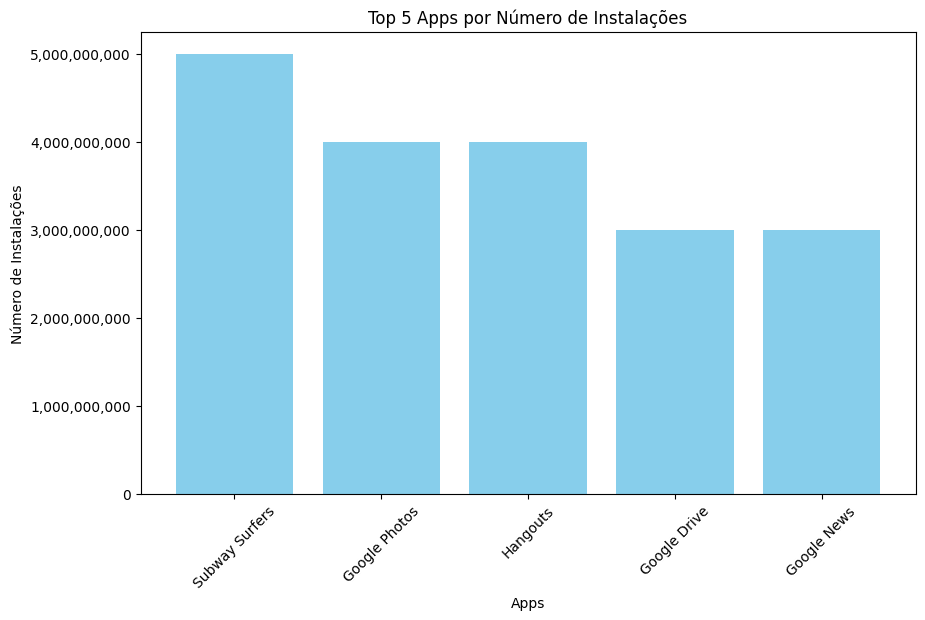

In [1267]:
plt.figure(figsize=(10, 6))
plt.bar(df_top_instalacoes['App'], df_top_instalacoes['Installs'], color='skyblue')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Apps por Número de Instalações')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


## Passo 3.1: Preparação dos Dados para o Gráfico de Pizza
Agrupa a coluna 'Category' pelo número percentual de ocorrências de cada categoria em relação ao todo.

In [1268]:
df_frenquencia_categorias = df_cleaned.groupby(df_cleaned['Category'])['Category'].value_counts().sort_values(ascending= False).reset_index()
df_frenquencia_categorias = df_cleaned['Category'].value_counts().reset_index()
df_frenquencia_categorias.columns = ['Category', 'Frequency']

## Passo 3: Criação do Gráfico de Pizza

Criação de um gráfico de pizza para visualizar as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.


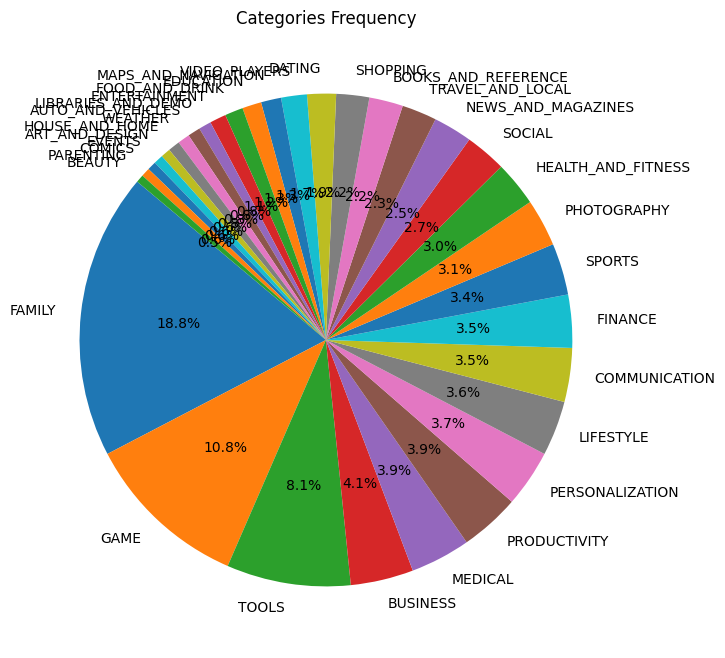

In [1269]:
plt.figure(figsize=(8, 8))
plt.pie(df_frenquencia_categorias['Frequency'], labels=df_frenquencia_categorias['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Categories Frequency')
plt.show()

## Passo 4: Identificar o App Mais Caro

1. Remove os '$' dos itens da coluna 'Price'.
2. Converte os itens da coluna 'Price' para float.
3. Calcula o valor mais alto dos itens na coluna 'Price'.

In [1270]:
df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '')
df_cleaned['Price'] = df_cleaned['Price'].astype(float)


In [1271]:
most_expensive_app = df_cleaned.loc[df_cleaned['Price'].idxmax()]

print("App mais caro:")
print(f"Nome: {most_expensive_app['App']}")
print(f"Preço: ${most_expensive_app['Price']}")
print(f"Categoria: {most_expensive_app['Category']}")

App mais caro:
Nome: I'm Rich - Trump Edition
Preço: $400.0
Categoria: LIFESTYLE


## Passo 5: Contar Apps Classificados como 'Mature 17+'

Calcula quantos apps são classificados como 'Mature 17+' no dataset.


In [1272]:
mature_17_count = df_cleaned[df_cleaned['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Número de apps classificados como 'Mature 17+': {mature_17_count}")

Número de apps classificados como 'Mature 17+': 447


## Passo 6: Mostrar os Top 10 Apps por Número de Reviews

1. Converte os itens da coluna 'Reviews' para Integer.
2. Agrupa os elementos da coluna 'App' em ordem decrescente pelos maiores valores da coluna 'Reviews'.

In [1273]:
df_cleaned['Reviews'] = df_cleaned['Reviews'].astype(int)
df_max_reviews = df_cleaned.groupby('App', as_index=False)['Reviews'].max().sort_values(by = 'Reviews', ascending=False).head(10)
df_max_reviews

,App,Reviews
4328,Facebook,78158306
9041,WhatsApp Messenger,69119316
5399,Instagram,66577446
6165,Messenger – Text and Video Chat for Free,56646578
2564,Clash of Clans,44893888
2573,Clean Master- Space Cleaner & Antivirus,42916526
8079,Subway Surfers,27725352
9225,YouTube,25655305
7721,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
2561,Clash Royale,23136735


## Passo 7: Cálculos Adicionais sobre o Dataset

1. Calcular a distribuição de ratings
2. Calcular a média de ratings dos apps ao longo dos anos


In [1274]:
# 1. Calcular a distribuição de ratings
rating_distribution = df_cleaned['Rating'].value_counts().sort_index().reset_index()
rating_distribution.columns = ['Rating', 'Frequency']
print(rating_distribution)


    Rating  Frequency
0      1.0         16
1      1.2          1
2      1.4          3
3      1.5          3
4      1.6          4
5      1.7          8
6      1.8          8
7      1.9         12
8      2.0         12
9      2.1          8
10     2.2         14
11     2.3         20
12     2.4         19
13     2.5         20
14     2.6         24
15     2.7         23
16     2.8         40
17     2.9         45
18     3.0         82
19     3.1         69
20     3.2         64
21     3.3        101
22     3.4        127
23     3.5        157
24     3.6        169
25     3.7        231
26     3.8        293
27     3.9        372
28     4.0        539
29     4.1        657
30     4.2        888
31     4.3       1016
32     4.4       1032
33     4.5        977
34     4.6        768
35     4.7        484
36     4.8        228
37     4.9         87
38     5.0        271


In [1275]:
# 2. Calcular a média de ratings dos apps ao longo dos anos
df_cleaned['Last Updated'] = pd.to_datetime(df_cleaned['Last Updated'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Last Updated'].dt.year

average_rating_by_year = df_cleaned.groupby('Year')['Rating'].mean().dropna()
print(average_rating_by_year)


Year
2010    4.200000
2011    3.966667
2012    3.785714
2013    4.069565
2014    4.036757
2015    4.064491
2016    4.039342
2017    4.094033
2018    4.241892
Name: Rating, dtype: float64


## Passo 8: Exibição Gráfica dos Indicadores com Matplotlib

Vamos criar duas formas gráficas de exibição dos indicadores utilizando a biblioteca Matplotlib:
1. Um gráfico de barras para as 5 categorias com o maior número de apps.
2. Um gráfico de linha para a média de ratings dos apps ao longo do tempo.


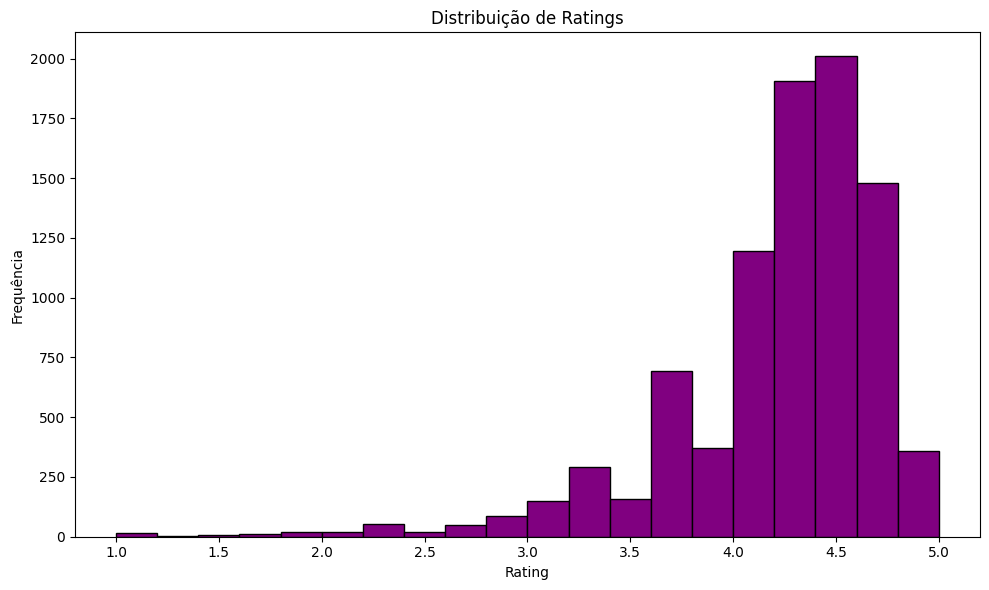

In [1276]:
# 1. Histograma - Distribuição de Ratings
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Rating'].dropna(), bins=20, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.title('Distribuição de Ratings')
plt.tight_layout()
plt.show()

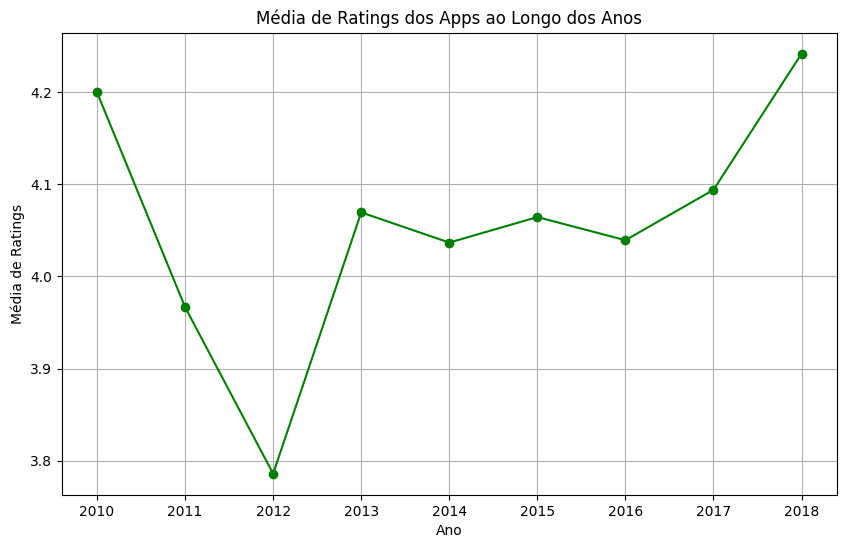

In [1277]:
# 2. Gráfico de linha - Média de ratings ao longo dos anos

plt.figure(figsize=(10, 6))
average_rating_by_year.plot(kind='line', marker='o', color='green')
plt.title('Média de Ratings dos Apps ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média de Ratings')
plt.grid()
plt.show()
